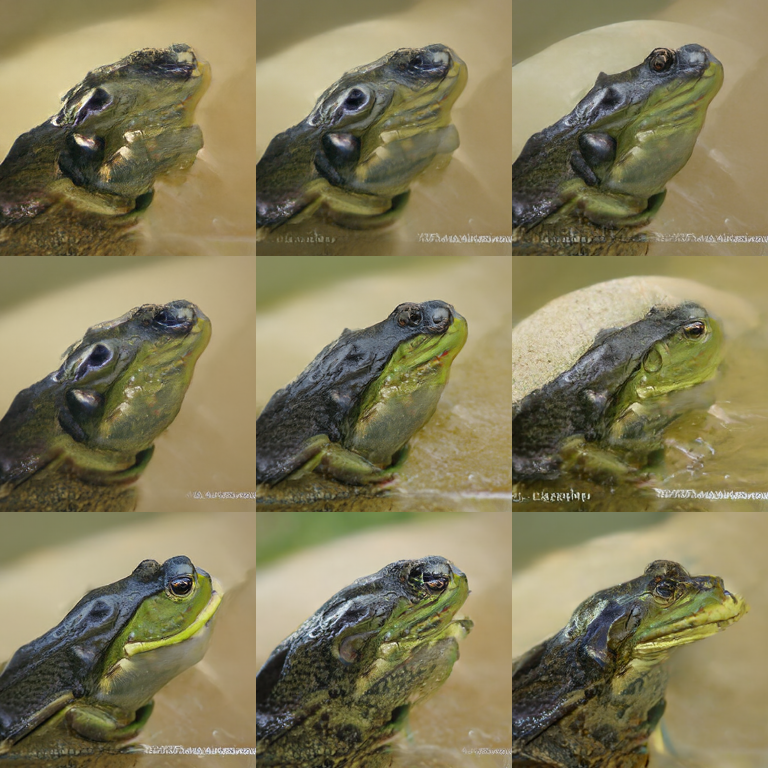

In [35]:
from typing import List, Dict
import os
from PIL import Image
from pathlib import Path
from IPython.display import display
from kdiff_trainer.iteration.batched import batched
from PIL import Image
model_names: List[str] = [
  '00_557M',
  '01_547M_8x8',
  '02_508M_16x16',
  '10_302M_mid',
  '11_295M_mid_8x8',
  '12_267M_mid_16x16',
  '20_139M_small',
  '21_134M_small_8x8',
  '22_117M_small_16x16',
]

# [[22, 12, 02],
#  [21, 11, 01],
#  [20, 10, 00]]
taxonomy: List[List[str]] = list(map(list, zip(*batched(reversed(model_names), 3))))

in_sample_dirs: Dict[str, Path] = {
  key: Path(f'out/fig7-batch/{key}_candidates') for key in model_names
}

master_dir: Path = in_sample_dirs['00_557M']
master_img_fnames: List[str] = os.listdir(master_dir)

image_size = (256, 256)
im_wid, im_hei = image_size

taxonomy_rows, taxonomy_cols = len(taxonomy), len(taxonomy[0])
grid_wid = taxonomy_cols * im_wid
grid_hei = taxonomy_rows * im_hei


for img_fname in master_img_fnames:
  grid_img = Image.new('RGB', (grid_wid, grid_hei))
  for row_ix, row in enumerate(taxonomy):
    for col_ix, model_name in enumerate(row):
      in_dir: Path = in_sample_dirs[model_name]
      img_path: Path = in_dir / img_fname
      
      image = Image.open(img_path)
      
      paste_x = col_ix * im_wid
      paste_y = row_ix * im_hei
      
      grid_img.paste(image, (paste_x, paste_y))

  # Display the concatenated grid image
  display(grid_img)
  
  break